In [1]:
using Compose
using Color

In [2]:
include("ExtractGoddamnedPositions01.jl")

limpiaarraystringfloat2 (generic function with 1 method)

In [40]:
Coincidencias=readdlm("RevueltasCoincidenPureJulia01.dat");

In [46]:
PuntosGDyCA=Coincidencias[:,1:4];
ValoresLinea=Coincidencias[:,5:7];

In [47]:
PuntosGDyCA

8365x4 Array{Float64,2}:
  0.0   0.0   0.0   0.0
 26.0  24.0  31.0  64.0
 28.0   8.0  31.0  64.0
 28.0  13.0  31.0  64.0
 28.0  23.0  31.0  64.0
 29.0   5.0  31.0  64.0
 30.0  18.0  31.0  64.0
 31.0  11.0  31.0  64.0
 31.0  17.0  31.0  64.0
 32.0   9.0  31.0  64.0
 32.0  12.0  31.0  64.0
 32.0  17.0  31.0  64.0
 32.0  21.0  31.0  64.0
  ⋮                    
 43.0   5.0  64.0  47.0
 43.0   6.0  64.0  47.0
 48.0   2.0  64.0  47.0
 49.0   8.0  64.0  47.0
 49.0   9.0  64.0  47.0
 50.0   2.0  64.0  47.0
 53.0   9.0  64.0  47.0
 55.0  10.0  64.0  47.0
 57.0  10.0  64.0  47.0
 57.0  12.0  64.0  47.0
 59.0  11.0  64.0  47.0
 62.0  10.0  64.0  47.0

In [52]:
PuntosGDyCA[5,:]

1x4 Array{Float64,2}:
 28.0  23.0  31.0  64.0

In [67]:
lineas=Any[]
GDxs=Int[]
GDys=Int[]
CAxs=Int[]
CAys=Int[]

tantos=0
for a =1:size(PuntosGDyCA)[1]
    MuestraGDCA=vec(PuntosGDyCA[a,:])
    MuestraLinea=vec(ValoresLinea[a,:])
    GDx=MuestraGDCA[1]
    GDy=MuestraGDCA[2]
    CAx=MuestraGDCA[3]
    CAy=MuestraGDCA[4]
    Peso=MuestraLinea[1]/(MuestraLinea[2]+MuestraLinea[3]-MuestraLinea[1]) #Jaccard
    if(Peso>0.0001)
        push!(GDxs,GDx)
        push!(GDys,GDy)
        push!(CAxs,CAx)
        push!(CAys,CAy) 
        push!(lineas, 
        (context(), 
        line([(GDx,GDy),(CAx,CAy)]), linewidth(Peso*20), 
        stroke(RGB(20*Peso, 0.00,0.00)
        )))
        tantos+=1
    end
end

In [62]:
tantos

2644

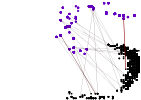

In [68]:
objeto=compose(context(units=UnitBox(0,0,65,65)), lineas...,  (context(),circle(GDxs, GDys, [0.5]), 
fill(RGB(0.4,0.0,0.76))), (context(), circle(CAxs, CAys, [0.4])))

In [69]:
draw(SVG("ConexionesRevueltasJacard01.svg", 20cm,20cm), objeto)